# SES network analysis practices

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel(r"Files/Gear-subgroup.xls")
data.shape
data

(6, 7)

,Unnamed: 0,7,11,12,13,14,15
0,7,3.61,0.16,0,0.00,0.25,0.10
1,11,0.16,6.49,0,0.00,0.43,0.00
2,12,0.00,0.00,0,0.00,0.00,0.00
3,13,0.00,0.00,0,NaN,0.72,1.01
4,14,0.25,0.43,0,0.72,1.97,0.36
5,15,0.10,0.00,0,1.01,0.36,4.33


In [11]:
attributes = pd.read_excel(r"Files/FishermenAttributes.xls", index_col=0)
attributes

,Gear,Religion,LivedInVillage,NumOfChild,HouseType,Age,Tribe,OutsideRelatives
10,14,1,4,0,2,23,5,1
50,15,1,3,1,2,42,5,1
110,15,1,4,6,2,48,5,2
120,15,1,3,0,0,31,3,1
470,15,1,3,6,1,35,4,2
...,...,...,...,...,...,...,...,...
2590,14,1,2,0,1,25,18,2
2600,14,1,2,4,2,40,18,2
2610,15,1,1,0,1,22,18,2
2620,15,1,3,0,2,30,18,2


In [30]:
users = pd.read_csv(r"Files/FishermenTies.csv", index_col=0)
users.head()
cp = []
for i in users.index:
    cp.extend([(i, x) for x in users.loc[i][users.loc[i] == 1].index])

len(cp)

,10,50,110,120,470,500,520,560,650,660,...,2530,2540,2550,2570,2580,2590,2600,2610,2620,2630
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
470,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


260

## Test for networkx

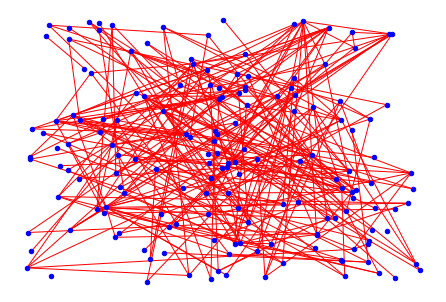

In [39]:
G = nx.Graph()

for i in attributes.index:
    labels = attributes.loc[i].to_dict()
    G.add_node(i, **labels)
    
G.add_edges_from(cp)
# nx.draw(G, size=30)
nx.draw(G,pos = nx.random_layout(G), node_color = 'b',edge_color = 'r',with_labels =False, font_size =18,node_size =20)

In [5]:
!python3 -m pip install python-igraph requests pandas networkx
!python3 -m pip install py4cytoscape

     |████████████████████████████████| 142 kB 1.1 MB/s eta 0:00:01


In [6]:
import IPython
import py4cytoscape as p4c
print(f'Loading Javascript client ... {p4c.get_browser_client_channel()} on {p4c.get_jupyter_bridge_url()}')
browser_client_js = p4c.get_browser_client_js()
IPython.display.Javascript(browser_client_js) # Start browser client

Loading Javascript client ... 1077886b-347f-4f2f-a6cb-754c764e8522 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

In [7]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.0.0',
 'py4cytoscapeVersion': '0.0.7'}

In [8]:
!curl -O https://nrnb.org/data/BasicDataVizDemo.cys

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1357k  100 1357k    0     0   877k      0  0:00:01  0:00:01 --:--:--  877k


In [9]:
p4c.sandbox_send_to("BasicDataVizDemo.cys")

{'filePath': '/Users/songshgeo/CytoscapeConfiguration/filetransfer/default_sandbox/BasicDataVizDemo.cys'}

In [10]:
p4c.open_session(file_location="BasicDataVizDemo.cys")

Opening /Users/songshgeo/CytoscapeConfiguration/filetransfer/default_sandbox/BasicDataVizDemo.cys...


{}

In [11]:
p4c.export_image(filename="BasicDataVizDemo.png")

{'file': '/Users/songshgeo/CytoscapeConfiguration/filetransfer/default_sandbox/BasicDataVizDemo.png'}

{'filePath': '/Users/songshgeo/CytoscapeConfiguration/filetransfer/default_sandbox/BasicDataVizDemo.png',
 'modifiedTime': '2021-03-23 16:32:36.0774',
 'fileByteCount': 42264}

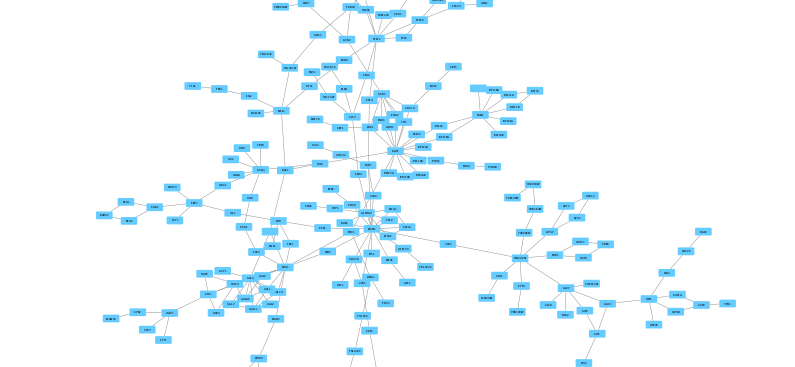

In [12]:
p4c.sandbox_get_from("BasicDataVizDemo.png")
from IPython.display import Image
Image('BasicDataVizDemo.png')

This is a demo of import network data from url.

And then Viz. it by Cytoscape.